In [ ]:
# Importation du module pandas avec l'alias conventionnel 'pd'
import pandas as pd
# Importation du module numpy avec l'alias conventionnel 'np'
import numpy as np
# Importation du module seaborn avec l'alias conventionnel 'sns'
import seaborn as sns
# Importation du module matplotlib.pyplot avec l'alias conventionnel 'plt'
import matplotlib.pyplot as plt

In [ ]:
# Chargement du fichier CSV 'df.csv' dans un DataFrame pandas
# Le DataFrame est stocké dans la variable 'df' pour manipulation ultérieure
df = pd.read_csv('df.csv')
df

,country_name,country_code,Year,"Enrolment in tertiary education, all programmes, both sexes (number)",Expenditure on education as % of total government expenditure (%),GDP per capita (current US$),Government expenditure on education as % of GDP (%),"Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)",Personal computers (per 100 people),"Population, ages 0-14 (% of total)","Population, ages 15-64 (% of total)"
0,Angola,AGO,2000,NaN,5.255080,555.296942,2.60753,8.336150,0.105046,NaN,0.107720,47.439566,50.130735
1,Angola,AGO,2001,NaN,NaN,526.168743,NaN,8.906100,0.136014,NaN,0.118176,47.448577,50.123345
2,Angola,AGO,2002,12566.0,NaN,711.181716,NaN,10.310580,0.270377,NaN,0.181371,47.414001,50.163814
3,Angola,AGO,2003,48184.0,NaN,779.468306,NaN,NaN,0.370682,NaN,NaN,47.355663,50.232256
4,Angola,AGO,2004,37547.0,NaN,1041.086844,NaN,NaN,0.464815,NaN,NaN,47.285839,50.316299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Zimbabwe,ZWE,2012,94012.0,29.199209,968.163871,8.38322,36.237690,12.000000,64.476013,NaN,41.500267,55.544672
812,Zimbabwe,ZWE,2013,94115.0,28.660339,1026.388289,8.48536,36.963619,15.500000,65.527359,NaN,41.507486,55.593661
813,Zimbabwe,ZWE,2014,NaN,30.007620,1031.104616,8.42933,NaN,16.364740,NaN,NaN,41.504385,55.642881
814,Zimbabwe,ZWE,2015,135575.0,NaN,1033.415842,NaN,NaN,22.742818,NaN,NaN,41.470558,55.705849


In [ ]:
# Appel de la méthode .info() sur le DataFrame df
# Cette méthode affiche un résumé concis des informations essentielles du DataFrame

#<class 'pandas.core.frame.DataFrame'>  # Type d'objet (DataFrame pandas)
#RangeIndex: X entries from 0 to X-1    # Nombre total de lignes (X = nombre d'entrées)
#Data columns (total Y columns):        # Nombre total de colonnes (Y = nombre de colonnes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   country_name                                                          816 non-null    object 
 1   country_code                                                          816 non-null    object 
 2   Year                                                                  816 non-null    int64  
 3   Enrolment in tertiary education, all programmes, both sexes (number)  416 non-null    float64
 4   Expenditure on education as % of total government expenditure (%)     411 non-null    float64
 5   GDP per capita (current US$)                                          785 non-null    float64
 6   Government expenditure on education as % of GDP (%)                   419 non-null    float64
 7  

In [ ]:
# Chaîne d'opérations pour analyser les valeurs manquantes :
# 1. df.isna() : Identifie les valeurs manquantes (NaN)
# 2. .sum() : Compte le nombre de True (valeurs manquantes) par colonne
# 3. .sort_values(ascending=False) : Trie les résultats en ordre décroissant
# Trie la Series résultante par valeurs
# ascending=False : du plus grand au plus petit
# Ainsi, les colonnes avec le PLUS de valeurs manquantes apparaissent EN PREMIER

df.isna().sum().sort_values(ascending=False)

Personal computers (per 100 people)                                     522
Expenditure on education as % of total government expenditure (%)       405
Enrolment in tertiary education, all programmes, both sexes (number)    400
Government expenditure on education as % of GDP (%)                     397
Lower secondary completion rate, both sexes (%)                         393
Gross enrolment ratio, upper secondary, both sexes (%)                  358
GDP per capita (current US$)                                             31
Internet users (per 100 people)                                          29
Population, ages 0-14 (% of total)                                        8
Population, ages 15-64 (% of total)                                       6
country_code                                                              0
country_name                                                              0
Year                                                                      0
dtype: int64

In [ ]:
# Création d'une liste contenant les noms des colonnes à supprimer
# Cette approche centralise les modifications pour plus de clarté et de maintenabilité

cols_drop = [
    "Personal computers (per 100 people)",
    "Expenditure on education as % of total government expenditure (%)",
    "Lower secondary completion rate, both sexes (%)"
]

# Suppression des colonnes spécifiées du DataFrame
# Méthode .drop() avec paramètre columns= pour indiquer les colonnes à retirer
# L'opération retourne un nouveau DataFrame (sans modifier l'original)
# On réaffecte le résultat à la variable df pour mise à jour

df = df.drop(columns=cols_drop)


In [ ]:
# Tri du DataFrame selon deux critères :
# 1. Par ordre alphabétique des noms de pays (colonne "country_name")
# 2. Puis par année croissante (colonne "Year") pour chaque pays
# Le résultat est un DataFrame organisé chronologiquement par pays

# Le tri s'effectue en deux niveaux :
# Niveau 1 : "country_name" (critère principal)
# Niveau 2 : "Year" (critère secondaire - appliqué PAR PAYS)

df = df.sort_values(["country_name", "Year"])

In [ ]:
# Liste des colonnes à traiter par interpolation
# Ces colonnes contiennent probablement des valeurs manquantes qu'on veut estimer

cols_interp = [
    "Internet users (per 100 people)",
    "GDP per capita (current US$)",
    "Gross enrolment ratio, upper secondary, both sexes (%)",
    "Enrolment in tertiary education, all programmes, both sexes (number)",
    "Government expenditure on education as % of GDP (%)"
]

# ÉTAPE 1 : Interpolation PAR PAYS
# On remplit les valeurs manquantes avec une interpolation linéaire temporelle
# pour chaque pays séparément, puis on complète avec les dernières/ premières valeurs

df[cols_interp] = (
    df
    .groupby("country_name")[cols_interp] # Grouper par pays
    .transform(lambda x: x.interpolate().ffill().bfill()) # Interpolation puis remplissage
)

# ÉTAPE 2 : Remplissage final par médiane globale
# Pour les valeurs restantes (si interpolation impossible)

df[cols_interp] = df[cols_interp].apply(lambda x: x.fillna(x.median()))

In [ ]:
# Calcul et affichage du nombre total de valeurs manquantes (NaN) par colonne
# Cette commande donne un aperçu rapide de la complétude des données après nettoyage
df.isna().sum()

country_name                                                            0
country_code                                                            0
Year                                                                    0
Enrolment in tertiary education, all programmes, both sexes (number)    0
GDP per capita (current US$)                                            0
Government expenditure on education as % of GDP (%)                     0
Gross enrolment ratio, upper secondary, both sexes (%)                  0
Internet users (per 100 people)                                         0
Population, ages 0-14 (% of total)                                      8
Population, ages 15-64 (% of total)                                     6
dtype: int64

## Après interpolation temporelle par pays, certains indicateurs présentent encore un nombre limité de valeurs manquantes, principalement concentrées sur des pays ou des périodes sans aucune donnée initiale. Ces valeurs résiduelles ont été conservées, les agrégations statistiques par pays étant calculées en ignorant automatiquement les valeurs manquantes, conformément aux pratiques standards en analyse exploratoire.

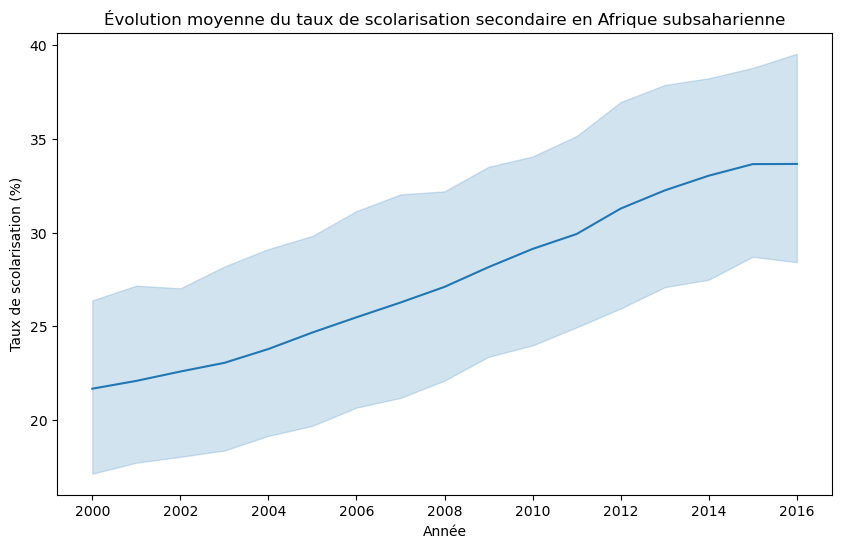

In [ ]:
# Création d'une figure de taille personnalisée (10 pouces de large × 6 pouces de haut)
# Cela permet d'avoir un graphique lisible avec assez d'espace pour les labels

plt.figure(figsize=(10,6))
# Création d'un graphique en ligne avec Seaborn
sns.lineplot(
    data=df, # DataFrame source des données
    x="Year", # Variable en abscisse (axe X) : l'année
    y="Gross enrolment ratio, upper secondary, both sexes (%)",  # Variable en ordonnée (axe Y)
    estimator="mean" # Agrégation : montre la MOYENNE à chaque année
)
# Personnalisation des titres et labels
plt.title("Évolution moyenne du taux de scolarisation secondaire en Afrique subsaharienne")
plt.xlabel("Année") # Label de l'axe X
plt.ylabel("Taux de scolarisation (%)")  # Label de l'axe Y

# Affichage du graphique
plt.show()

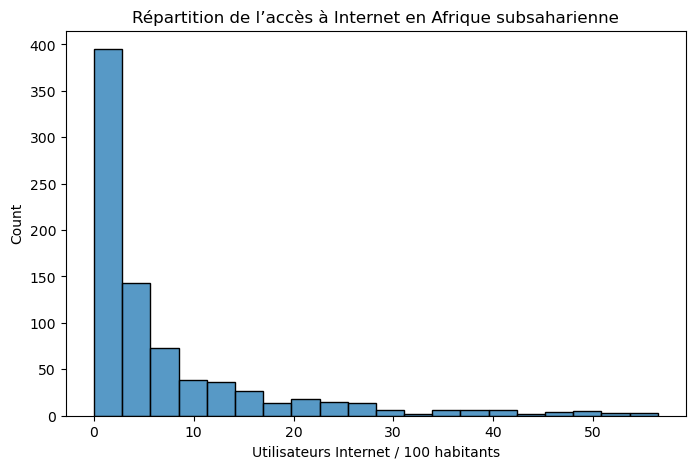

In [ ]:
# Création d'une figure de 8 pouces de large × 5 pouces de haut
# Format adapté pour une distribution univariée (une seule variable)
plt.figure(figsize=(8,5))

# Création d'un histogramme avec Seaborn
# Histplot montre la distribution d'une variable numérique continue
sns.histplot(df["Internet users (per 100 people)"], # Variable à analyser
 bins=20 # Nombre de barres/intervalles dans l'histogramme
 )
 # Personnalisation des titres
plt.title("Répartition de l’accès à Internet en Afrique subsaharienne")
plt.xlabel("Utilisateurs Internet / 100 habitants")  # Unité claire
plt.ylabel("Nombre de pays") # Par défaut, compte les observations

# Sauvegarde du graphique en fichier image PNG

plt.savefig("Accès à l'internet.png")  

# Affichage du graphique
plt.show()

## *La distribution montre une forte hétérogénéité entre les pays, avec une majorité présentant un accès encore limité au numérique.

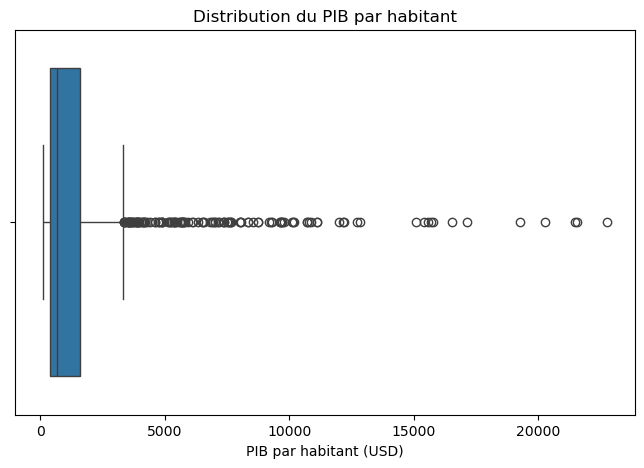

In [ ]:
# Création d'un boxplot pour analyser la distribution du PIB par habitant
# Le boxplot est idéal pour visualiser la dispersion, la médiane et les outliers
plt.figure(figsize=(8,5))

# Création d'un boxplot horizontal (x=...) pour la variable PIB/habitant
sns.boxplot(x=df["GDP per capita (current US$)"])

# Personnalisation des titres et labels
plt.title("Distribution du PIB par habitant")
plt.xlabel("PIB par habitant (USD)")

# Sauvegarde du graphique
plt.savefig("pib.png")

# Affichage
plt.show()

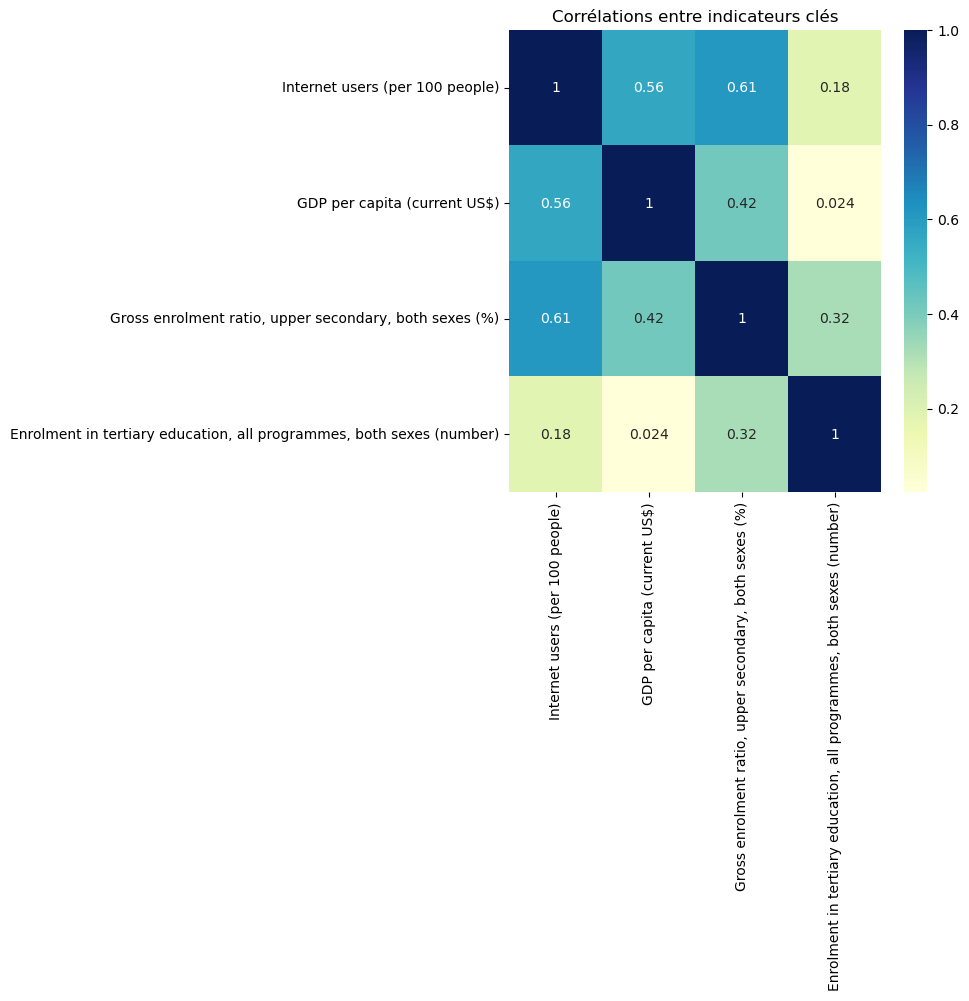

In [ ]:
# Calcul de la matrice de corrélation pour 4 indicateurs clés de développement
corr = df[[
    "Internet users (per 100 people)",  # Accès numérique
    "GDP per capita (current US$)", # Richesse économique
    "Gross enrolment ratio, upper secondary, both sexes (%)",  # Éducation secondaire
    "Enrolment in tertiary education, all programmes, both sexes (number)" # Éducation supérieure
]].corr()   # Méthode .corr() calcule les coefficients de corrélation de Pearson

# Création d'une figure carrée (6×6 pouces) pour une matrice symétrique
plt.figure(figsize=(6,6))

# Création d'une heatmap (carte de chaleur) des corrélations
sns.heatmap(corr,  # Matrice de corrélation
 annot=True, # Affiche les valeurs numériques dans chaque cellule
  cmap="YlGnBu" # Palette de couleurs : Jaune → Vert → Bleu
  )
plt.title("Corrélations entre indicateurs clés")
plt.show()

In [ ]:
#  Normalisation (0–100)

In [ ]:

# Définition d'une fonction de normalisation Min-Max
# Cette fonction transforme une série numérique en une échelle de 0 à 100
def min_max(series):
    return 100 * (series - series.min()) / (series.max() - series.min())

# Scale Score – Taille du marché (35 %)

In [ ]:
# Création d'un indicateur composite "scale_raw" 
# (hypothèse : mesure de l'échelle du système éducatif supérieur numérique)

df["scale_raw"] = (
    # 1. Transformation logarithmique des inscriptions tertiaires
    # np.log1p = log(1 + x) pour gérer les zéros et réduire l'impact des très grandes valeurs
    np.log1p(df["Enrolment in tertiary education, all programmes, both sexes (number)"])

    # 2. Multiplication par le taux d'accès Internet
    # Hypothèse : l'éducation numérique nécessite un accès Internet

    * df["Internet users (per 100 people)"]
    # 3. Multiplication par la proportion de population en âge de travailler (15-64 ans)
    # Hypothèse : le système éducatif sert principalement cette tranche d'âge
    * df["Population, ages 15-64 (% of total)"]
)
# Normalisation du score brut en une échelle 0-100 pour faciliter l'interprétation
df["scale_score"] = min_max(df["scale_raw"])

# Momentum Score – Dynamique (25 %)

In [ ]:
# Calcul de la "momentum" ou tendance d'accès Internet par pays
# Cette métrique mesure l'amélioration (ou détérioration) de l'accès Internet sur la période
momentum = (
    df
    .groupby("country_name")["Internet users (per 100 people)"]  # Grouper par pays
    .apply(lambda x: x.iloc[-1] - x.iloc[0]) # Calculer la différence entre dernière et première valeur
    .reset_index(name="internet_trend")  # Remettre en DataFrame avec nom de colonne explicite
)

In [ ]:
# Normalisation de la tendance Internet (internet_trend) en un score entre 0 et 100
# Cela permet de comparer facilement les pays sur une échelle standardisée
momentum["momentum_score"] = min_max(momentum["internet_trend"])

# Ability to Pay – Capacité de paiement (25 %)

In [ ]:
# Création d'un indicateur composite "ability_raw" 
# (hypothèse : mesure de la capacité financière à investir dans l'éducation)

df["ability_raw"] = (
     # 1. Richesse économique par habitant
    df["GDP per capita (current US$)"]

    # 2. Priorité budgétaire donnée à l'éducation
    * df["Government expenditure on education as % of GDP (%)"] / 100

    # Division par 100 pour convertir le pourcentage en proportion (ex: 25% → 0.25)
)

# Normalisation en score 0-100 pour faciliter l'interprétation
df["ability_score"] = min_max(df["ability_raw"])


# Digital Readiness – Faisabilité (15 %)

In [ ]:
# Création d'un indicateur digital basé uniquement sur l'accès Internet
df["digital_raw"] = df["Internet users (per 100 people)"] # Copie directe de la variable
df["digital_score"] = min_max(df["digital_raw"]) # Normalisation en score 0-100


# Agrégation par pays

In [ ]:
# Agrégation et fusion des scores principaux par pays
scores = (
    df
     # 1. Groupement par pays et calcul des moyennes des trois scores
    .groupby("country_name")[["scale_score", "ability_score", "digital_score"]]
    .mean() # Moyenne sur toutes les années disponibles
    .reset_index() # Remet 'country_name' comme colonne (pas comme index)

    # 2. Fusion avec les données de momentum (progrès récent)
    .merge(momentum, on="country_name") # Jointure sur la colonne 'country_name'
)

# Calcul final du MAS

In [ ]:
# Calcul d'un indice composite appelé "MAS" (Score d’attractivité du marché)
# Cet indice combine les quatre dimensions clés avec des pondérations spécifiques
scores["MAS"] = (
    0.35 * scores["scale_score"] # 35% - Échelle du système éducatif numérique
    + 0.25 * scores["momentum_score"]  # 25% - Dynamique de progression
    + 0.25 * scores["ability_score"]  # 25% - Capacité financière
    + 0.15 * scores["digital_score"] # 15% - Accès numérique actuel
)

# Classement final des pays

In [ ]:
# Tri du DataFrame 'scores' par la colonne 'MAS' en ordre décroissant
# Cela permet d'obtenir le classement des pays du meilleur au moins bon score MAS
scores = scores.sort_values("MAS", ascending=False)
scores.head(10)

,country_name,scale_score,ability_score,digital_score,internet_trend,momentum_score,MAS
36,Seychelles,27.699379,58.299096,61.942816,49.119079,100.000000,58.560979
39,South Africa,40.568124,36.194410,39.110838,48.651440,99.047949,53.876059
28,Mauritius,37.967681,32.316775,45.332731,45.944643,93.537265,51.552108
2,Botswana,17.740529,65.514106,22.476611,36.460331,74.228450,44.516316
5,Cabo Verde,23.610967,18.233023,35.846889,46.342834,94.347929,41.786110
16,Gabon,16.933044,27.768697,27.131340,46.836133,95.352222,40.776496
30,Namibia,11.123170,35.546722,16.742395,29.388606,59.831347,30.248986
13,Equatorial Guinea,5.966349,55.240527,12.660413,23.647645,48.143503,29.833292
42,Swaziland,12.006295,21.688416,19.977757,27.647331,56.286338,26.692556
18,Ghana,13.676427,7.366243,16.253520,34.512385,70.262688,26.632010


# Visualisations

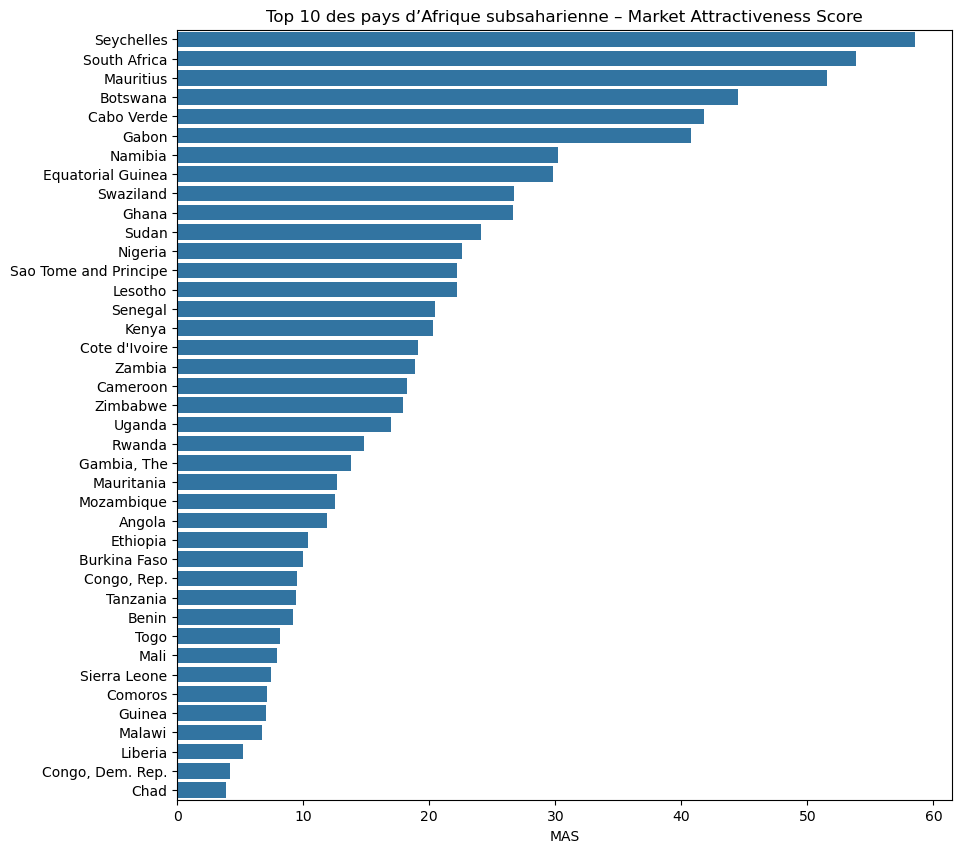

In [ ]:
# Création d'un graphique en barres horizontales pour les 40 premiers pays
# Figure carrée pour meilleure lisibilité
plt.figure(figsize=(10,10))
# Création du barplot horizontal avec Seaborn
sns.barplot(data=scores.head(40), # Prendre les 40 premiers pays (après tri par MAS décroissant)
 x="MAS", # Variable en abscisse : score MAS
 y="country_name")  # Variable en ordonnée : noms des pays

plt.title("Top 10 des pays d’Afrique subsaharienne – Market Attractiveness Score")
plt.xlabel("MAS") # Label de l'axe X
plt.ylabel("") # Label de l'axe Y vide (les noms de pays suffisent)
plt.show()

# Heatmap des sous-scores (Top 10)

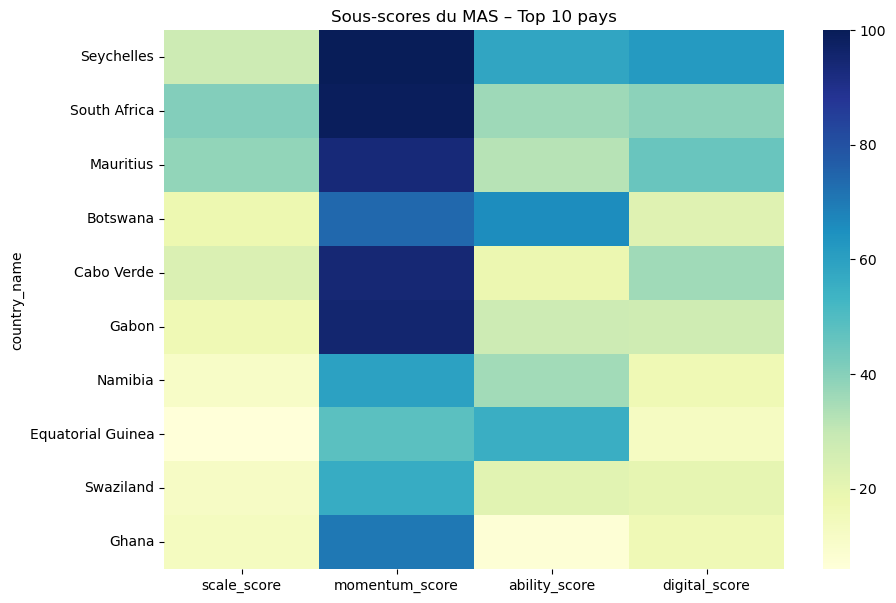

In [ ]:
# Préparation des données pour la heatmap
# On prend les 10 premiers pays et on sélectionne les 4 composantes du MAS
heatmap_data = scores.set_index("country_name")[
    ["scale_score", "momentum_score", "ability_score", "digital_score"]
].head(10) # Sélection des 10 premiers pays

# Création de la heatmap
plt.figure(figsize=(10,7)) # Taille optimale pour 10 pays × 4 variables
# Génération de la heatmap avec Seaborn
sns.heatmap(heatmap_data,  # Données à visualiser (DataFrame 10×4)
 cmap="YlGnBu" # Palette de couleurs : Jaune → Vert → Bleu
 )
plt.title("Sous-scores du MAS – Top 10 pays")

# Affichage
plt.show()

# segmentation

In [ ]:
# Définition d'une fonction de segmentation de marché basée sur le score MAS
def segment_market(mas):
    if mas >= 50:
        return "Priorité 1 – Go-to-Market"
    elif mas >= 35:
        return "Priorité 2 – Build & Partnerships"
    else:
        return "Priorité 3 – Niche / Long terme"

In [ ]:
# Application de la fonction de segmentation à chaque pays
scores["segment"] = scores["MAS"].apply(segment_market)

# Affichage des 10 premiers pays avec leur segment
scores.head(10)

,country_name,scale_score,ability_score,digital_score,internet_trend,momentum_score,MAS,segment
36,Seychelles,27.699379,58.299096,61.942816,49.119079,100.000000,58.560979,Priorité 1 – Go-to-Market
39,South Africa,40.568124,36.194410,39.110838,48.651440,99.047949,53.876059,Priorité 1 – Go-to-Market
28,Mauritius,37.967681,32.316775,45.332731,45.944643,93.537265,51.552108,Priorité 1 – Go-to-Market
2,Botswana,17.740529,65.514106,22.476611,36.460331,74.228450,44.516316,Priorité 2 – Build & Partnerships
5,Cabo Verde,23.610967,18.233023,35.846889,46.342834,94.347929,41.786110,Priorité 2 – Build & Partnerships
16,Gabon,16.933044,27.768697,27.131340,46.836133,95.352222,40.776496,Priorité 2 – Build & Partnerships
30,Namibia,11.123170,35.546722,16.742395,29.388606,59.831347,30.248986,Priorité 3 – Niche / Long terme
13,Equatorial Guinea,5.966349,55.240527,12.660413,23.647645,48.143503,29.833292,Priorité 3 – Niche / Long terme
42,Swaziland,12.006295,21.688416,19.977757,27.647331,56.286338,26.692556,Priorité 3 – Niche / Long terme
18,Ghana,13.676427,7.366243,16.253520,34.512385,70.262688,26.632010,Priorité 3 – Niche / Long terme


In [ ]:
# Compte le nombre de pays dans chaque segment de marché
# Retourne une Series avec les segments comme index et les counts comme valeurs
scores["segment"].value_counts()

segment
Priorité 3 – Niche / Long terme      42
Priorité 1 – Go-to-Market             3
Priorité 2 – Build & Partnerships     3
Name: count, dtype: int64

## La segmentation stratégique permet de traduire le score MAS en décisions opérationnelles. Elle distingue les marchés immédiatement exploitables de ceux nécessitant une approche progressive ou une stratégie de long terme.

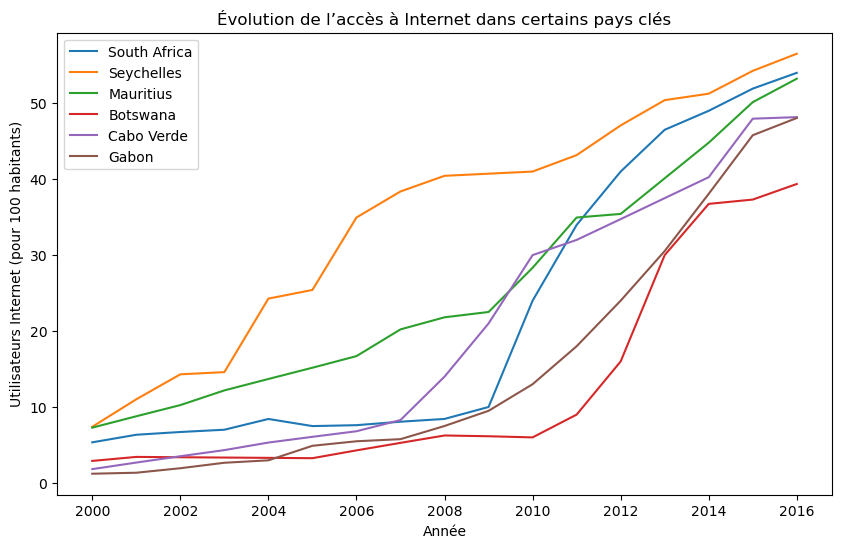

In [ ]:
# Focus sur certains pays clés
countries_focus = ["South Africa", "Seychelles", "Mauritius", "Botswana", "Cabo Verde", "Gabon"]
plt.figure(figsize=(10,6))
for c in countries_focus:
    subset = df[df["country_name"] == c]
    plt.plot(
        subset["Year"],
        subset["Internet users (per 100 people)"],
        label=c
    )

plt.title("Évolution de l’accès à Internet dans certains pays clés")
plt.xlabel("Année")
plt.ylabel("Utilisateurs Internet (pour 100 habitants)")
plt.legend()
plt.show()


L’accès à Internet progresse de manière continue dans l’ensemble des pays étudiés, avec une accélération notable dans des pays comme le Ghana ou Maurice. Cette dynamique renforce le potentiel futur des services de formation en ligne, même dans des marchés encore intermédiaires.

La distribution montre une forte hétérogénéité entre les pays, avec une majorité présentant un accès encore limité au numérique.

## Présentation du dataset et qualité des données

** Le dataset est issu de la Banque mondiale et couvre des indicateurs éducatifs, économiques, démographiques et numériques pour les pays d’Afrique subsaharienne. Les indicateurs retenus présentent moins de 50 % de valeurs manquantes. Les données ont été nettoyées et complétées par interpolation temporelle par pays afin d’assurer la cohérence des séries.**

## Principaux résultats statistiques et visuels

Forte hétérogénéité entre pays

Existence de marchés très connectés mais de petite taille

Progression générale de la connectivité numérique

Corrélation forte entre niveau de revenu et faisabilité EdTech

## Interprétation des tendances

L’Afrique subsaharienne présente un potentiel EdTech contrasté. Si certains pays disposent déjà des conditions nécessaires à un déploiement immédiat, d’autres montrent une dynamique positive qui justifie une approche progressive fondée sur des partenariats.

## Limites de l’analyse

Cette analyse repose sur des données secondaires dont la disponibilité est inégale selon les pays. Certains indicateurs clés, comme la qualité de l’infrastructure numérique ou le pouvoir d’achat réel des ménages, ne sont pas directement observables. Les résultats doivent donc être interprétés comme un outil d’aide à la décision et non comme une prédiction exacte.

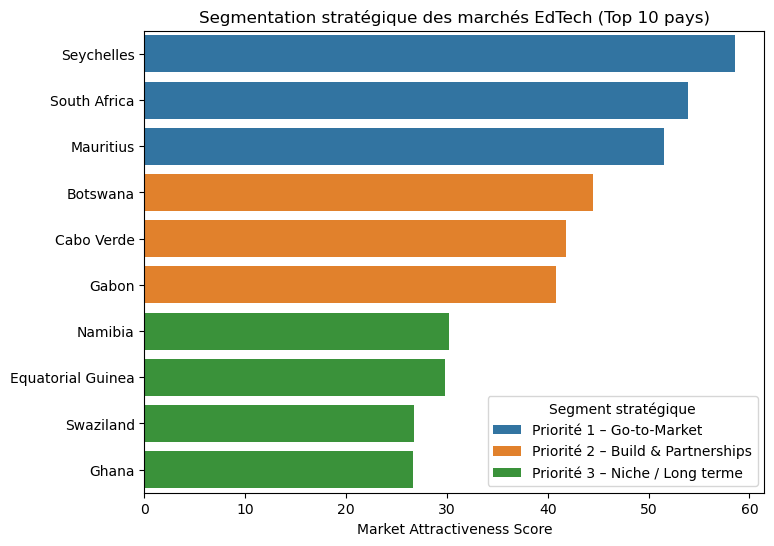

In [ ]:
# Segmentation stratégique des marches pour les tops 10 pays
plt.figure(figsize=(8,6))

sns.barplot(
    data=scores.sort_values("MAS", ascending=False).head(10),
    x="MAS",
    y="country_name",
    hue="segment"
)

plt.title("Segmentation stratégique des marchés EdTech (Top 10 pays)")
plt.xlabel("Market Attractiveness Score")
plt.ylabel("")
plt.legend(title="Segment stratégique")
plt.savefig("segmentation stratégique.png")
plt.show()

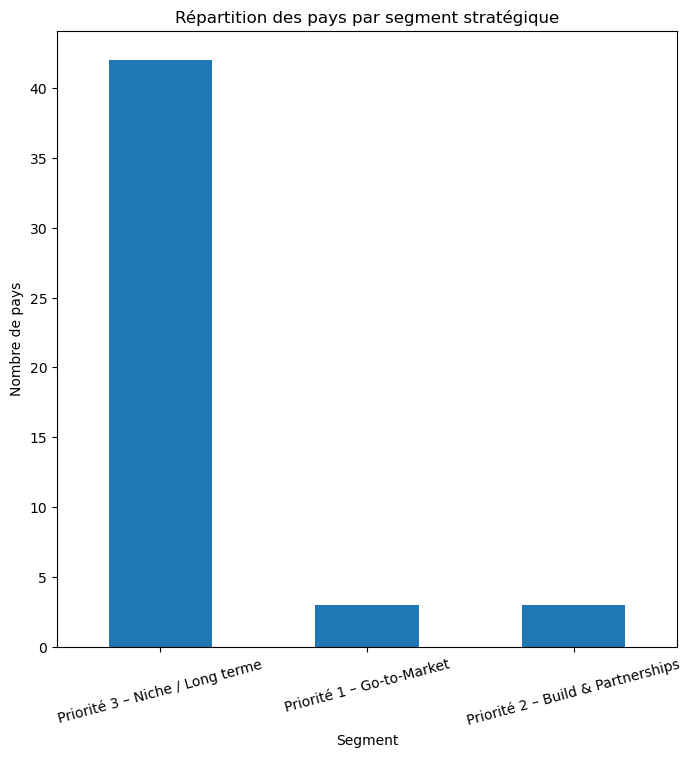

In [ ]:
# Repartitions des pays par segmentation
plt.figure(figsize=(8,8))

scores["segment"].value_counts().plot(kind="bar")

plt.title("Répartition des pays par segment stratégique")
plt.xlabel("Segment")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=15)
plt.savefig("tailles de la segmentaire.png")
plt.show()
